# Recomendaciones experimentales. 

Todo experimento debe ser corrido 100 veces con 3 millones de iteraciones.

In [1]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
% matplotlib inline

import random
from bitarray import bitarray


# Taller 1


## Rastrigin

https://www.sfu.ca/~ssurjano/rastr.html
https://en.wikipedia.org/wiki/Rastrigin_function






function y = Rastrigin (X)
	
    % Rastrigin's Function
	A = 10;
	n = 2;
	m = 0;
    
	for i = 1:n
		m = m + X(i)^2 - A*cos(2*pi*X(i));
	end
	
	y = 10*n + m;	
	
end


In [2]:
def rastrigin(X_array, A=10, m=0):
    n=len(X_array)
    y=A*n+(sum([(x_val**2)-(A*math.cos(2*math.pi*x_val))for x_val in X_array]))
    return y

In [3]:
# Generar un vector de n=10 dimensiones entre los valores factibles.
def rand_vec (n_dims=10, min_factible=-5.12, max_factible=5.12):
    X_array=[random.uniform(min_factible,max_factible) for i in range(n_dims)]
    return np.array(X_array)

In [4]:
rastrigin(rand_vec())

195.19315128953815

In [5]:
rastrigin([2.5,2.5])

52.5

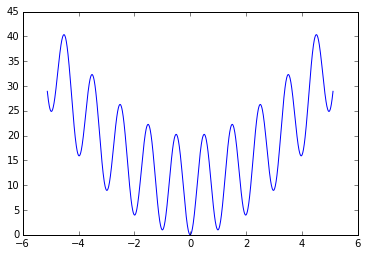

In [6]:
range_val=(np.array((range(1025)))/100.0)-5.12
rast_fit=[rastrigin ([x_dot]) for x_dot in range_val]
plt.plot(range_val,rast_fit)

## Ascenso colina

In [9]:
# Generar delta (de cambio) para cada punto en la dimensión
def delta_unif_rand(n_dims=10):
    return np.array([random.random()*2-1 for dim in range(n_dims)])

def delta_gauss_rand(n_dims=10, sigma=1):
    return np.array([random.gauss(0, sigma) for dim in range(n_dims)])

#def delta_power_rand()

In [10]:
X_vals=rand_vec()
print (X_vals)
deltas=delta_unif_rand()
print (deltas)

np.array(X_vals)+np.array(deltas)

[-5.10639983  3.34964447  1.37545284 -2.50744764 -4.73933076  1.56208819
 -3.42839739 -2.19377922 -5.10884521  2.54354375]
[-0.63447326  0.75662934 -0.4783281  -0.25419623 -0.42376476 -0.13951644
 -0.98547308  0.34301511  0.23106898 -0.2564005 ]


array([-5.74087309,  4.10627381,  0.89712475, -2.76164387, -5.16309552,
        1.42257175, -4.41387046, -1.8507641 , -4.87777623,  2.28714325])

In [11]:
def ascenso_colina (n_iters=1000, n_dims=10, min_factible=-5.12, max_factible=5.12, distrib="unif", sigma=1):
    X_arr=rand_vec(n_dims)
    #print(X_arr)
    for i_iter in range(n_iters):
        if distrib=="unif":
            deltas=delta_unif_rand(n_dims)
        if distrib=="gauss":
            deltas=delta_gauss_rand(n_dims, sigma)
        X_arr_2=X_arr+deltas
        for i_dim in range(n_dims):
            if X_arr_2[i_dim]>=max_factible:
                X_arr_2[i_dim]=max_factible
            if X_arr_2[i_dim]<=min_factible:
                X_arr_2[i_dim]=min_factible
        ras_X_arr=rastrigin(X_arr)
        ras_X_arr_2=rastrigin(X_arr_2)
        if ras_X_arr_2<=ras_X_arr:
            X_arr=X_arr_2
            #print "Iter: ",i_iter,"| Rastrigin: ",ras_X_arr_2
    return [rastrigin(X_arr),X_arr]

In [ ]:
test_unif=[ascenso_colina(n_iters=100000,n_dims=10, distrib="unif") for k in xrange(1000)]
y_uniform=[rast[0] for rast in test_unif]

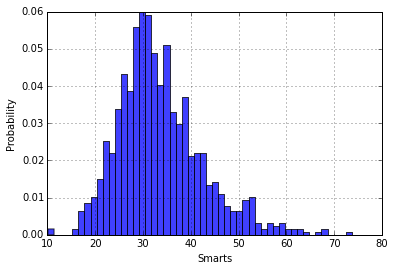

In [75]:
n, bins, patches = plt.hist(y_uniform, 50, normed=1, facecolor='blue', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

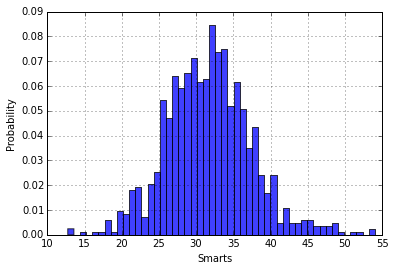

In [76]:
test_gauss_sigma1=[ascenso_colina(n_iters=100000,n_dims=10, distrib="gauss", sigma=1) for k in xrange(1000)]
y_gauss_sigma1=[rast[0] for rast in test_gauss_sigma1]

n, bins, patches = plt.hist(y_gauss_sigma1, 50, normed=1, facecolor='blue', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

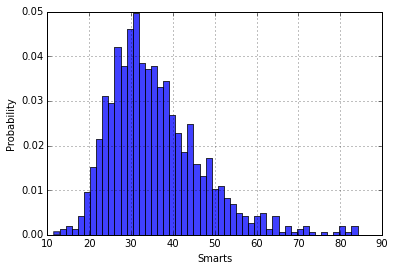

In [77]:
test_gauss_sigma05=[ascenso_colina(n_iters=100000,n_dims=10, distrib="gauss", sigma=0.5) for k in xrange(1000)]
y_gauss_sigma05=[rast[0] for rast in test_gauss_sigma05]

n, bins, patches = plt.hist(y_gauss_sigma05, 50, normed=1, facecolor='blue', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.grid(True)

plt.show()

# Taller 2 Ruleta
1. Generar 3 probabilidades (cada una dicotómica) (¿Distribución binomial?)
 
     $n=3$
 
     $p_{1}= 0.5$
     
     $p_{2}= 0.3$
     
     $p_{3}= 0.2$


2. Iterar k veces (1 corrida).
- sacar la probabilidad de p en cada corrida $$

3. correr r veces las iteraciones.

http://eli.thegreenplace.net/2010/01/22/weighted-random-generation-in-python/

http://stackoverflow.com/questions/177271/roulette-selection-in-genetic-algorithms/5315710#5315710

http://geneticalgorithms.ai-depot.com/Tutorial/Overview.html


In [189]:
def selec_rulet_a(pesos_candid, n):
    elecs=[]
    probs=[float(p_i)/sum(pesos_candid) for p_i in pesos_candid]
    for i_num in xrange(n):
        r_num=random.random()
        cumsum=[sum(probs[:i+1]) for i in xrange(len(probs))]
        elec=None
        for i_sum in enumerate(cumsum):
            if r_num <= i_sum[1]:
                elec=i_sum[0]+1
                break
        elecs.append(elec)
    return elecs

In [373]:
def gener_props(vec_pesos,n_iter,reps):
    props_res=[]
    for i in xrange(reps):
        generados=selec_rulet(vec_pesos,n_iter)
        result=list(np.array([generados.count(i) for i in set(generados)])/float(len(generados)))
        props_res.append(result)
    return np.mean(np.array(props_res),axis=0)

In [379]:
pesos=[5,3,2]
print(np.array(pesos)/float(sum(pesos)))
#print(np.mean(gener_props(pesos,10000,10000),axis=0))
print gener_props(pesos,10000,1000)

[ 0.5  0.3  0.2]
[ 0.5002381  0.2998813  0.1998806]


In [380]:
np.array([13, 17, 19, 23, 29])/float(sum([13, 17, 19, 23, 29]))

array([ 0.12871287,  0.16831683,  0.18811881,  0.22772277,  0.28712871])

## ley de potencia


## Clase mar 8 2017

Selección de uno perteneciente a la población según su proporción de ajuste.
identificar el mínimo de distancia y tomarlo como un "cuanto", trabajarlo sobre la escala (rango de mínimo y máximo)

In [6]:
vals=[random.randrange(-5, 5) for i in range (8)]
sorted(vals, key=int)   

[-5, -4, -4, 0, 1, 2, 3, 4]

### Selección por ranking

el F se asigna a los "cuantos".
### Trabajo independiente:
- Implementar los métodos de selección por ruleta, ranking y torneo

## Tarea

- 

# clase 15 marzo 2017

- Universal stochastic sampling

## teorema del esquema de holland
- https://www.cse.unr.edu/~sushil/class/gas/notes/GASchemaTheorem2.pdf
- https://engineering.purdue.edu/~sudhoff/ee630/Lecture03.pdf
- https://es.slideshare.net/AndresMendezVazquez/072-hollands-genetic-algorithmsschematheorem


# clase 17 de marzo

100 individuos 
código binario
hacer un algoritmo genètico
con solo selecciòn
cómo evolucionaría la poblaciòn hacièndo solo selecciòn.
100 iteraciones
imprimir cada 10


https://pypi.python.org/pypi/bitarray/


- binarios
- fitnes: cuántos 1 tiene


In [16]:
# generar población
def pop_gener(N_pob, len_ind_bits):
    #Generador de poblaciones al azar
    return [bitarray(len_ind_bits) for indiv in xrange(N_pob)]

# calcular fitness
def fitness_ind(ind):
    return sum([1 for bit in ind if bit==True])

# Selección de ruleta
def selec_rulet(vec_fitness, n):
    # Devueleve una cantidad n de individuos a partir de la probabilidad proporcional a su fitness (mayor fitness, mayor probabilidad)
    elecs=[]
    probs=[float(p_i)/sum(vec_fitness) for p_i in vec_fitness]
    for i_num in xrange(n):
        r_num=random.random()
        cumsum=[sum(probs[:i+1]) for i in xrange(len(probs))]
        elec=None
        for i_sum in enumerate(cumsum):
            if r_num <= i_sum[1]:
                elec=i_sum[0]# devuleve el índice del seleccionado
                break
        elecs.append(elec)
    return elecs

def next_select(parents, N_next_gen):
    fitness_P_A=[fitness_ind(indiv) for indiv in parents]
    selected=selec_rulet(fitness_P_A, N_next_gen)
    N_P=[parents[ind_sel]for ind_sel in selected]
    return N_P

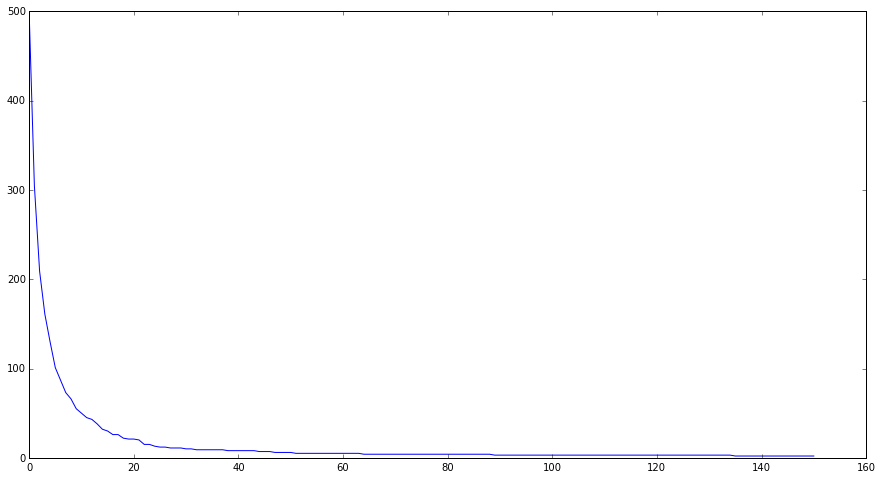

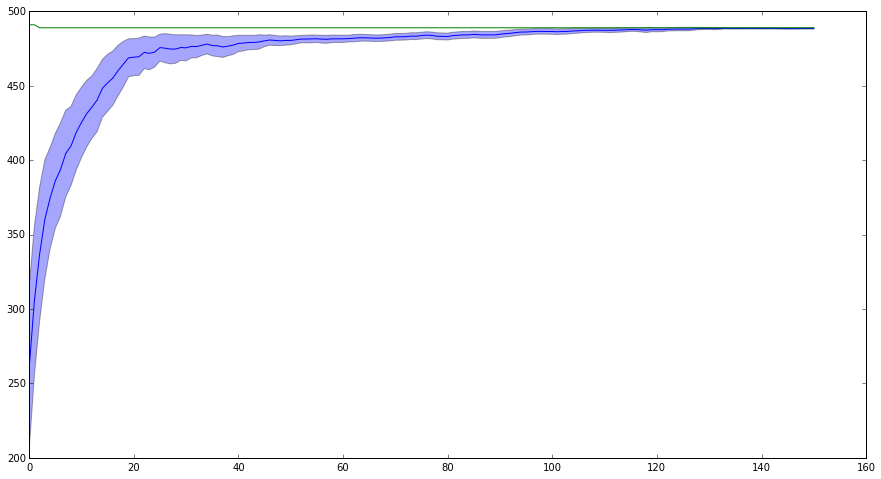

In [127]:
iteraciones=150
pars_1=pop_gener(500, 1000)
evolution=[]
fitness_population=[fitness_ind(indiv) for indiv in pars_1]
evolution=[[len(set(pars_1)),
            max(fitness_population),
            round(np.mean(fitness_population),2),
            round(np.std(fitness_population),2)
           ]]#propiedades de las poblaciones a lo largo de las generaciones

for i in xrange(iteraciones):
    offsp=next_select(pars_1,len(pars_1))
    pars_1=offsp
    inds_popul=len(set(offsp))
    fintess_offspring=[fitness_ind(indiv) for indiv in offsp]
    best_fitness=max(fintess_offspring)
    avg_fit=round(np.mean(fintess_offspring),2)
    desvest_fit=round(np.std(fintess_offspring),2)
    evolution.append([inds_popul,best_fitness,avg_fit,desvest_fit])

evolution=np.array(evolution)
plt.figure(figsize=(15,8))
plt.plot(evolution[:,0])

plt.figure(figsize=(15,8))
plt.fill_between(xrange(len(evolution[:,2])), evolution[:,2]+evolution[:,3]/2, evolution[:,2]-evolution[:,3]/2, alpha=.35)
plt.plot(xrange(len(evolution[:,2])),evolution[:,2])
plt.plot(xrange(len(evolution[:,2])),evolution[:,1])
plt.show()